In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
from glob import glob

In [6]:
endpoint = 'dao.cdqd2bwz9q4s.ap-northeast-2.rds.amazonaws.com'
schema = 'dao'
db_connection_str = 'mysql+pymysql://admin:ekfkawnl@{}/{}'.format(endpoint, schema)
try :
    db_connection = create_engine(db_connection_str)
    conn = db_connection.connect()
except :
    print('fail to connect db')

def load_data_from_rds(tabel_name):
  sql = "SELECT * FROM {}".format(tabel_name)
  df = pd.read_sql(sql, db_connection)
  return df

In [12]:
df = pd.read_csv('.././data/CSV/하천_join.csv', encoding='cp949')
df

,번호,위도_십진,경도_십진,생태통로타,차선_수,등산객이용,생태통로효,이용확인종,이용확인,면적_m^2,...,join_UID1,join_INDEXPAGE2,join_LEVEL2,join_RIVLEN2,join_RIV_CD_1,join_RIV_NAM_1,join_UID2,join_layer,join_path,distance
0,1495,35.36019,128.06375,0,1,1,3,NaN,0,NaN,...,NaN,",223,225",지방2,45.8,2024690.0,양천,2468.0,W_SCND_5181,D:/datacampus_dao/data/국가 및 지방하천/W_SCND_5181.shp,134.468063
1,1277,37.03408,128.40661,1,0,0,3,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_FRST_5181,D:/datacampus_dao/data/국가 및 지방하천/W_FRST_5181.shp,434.781679
2,1278,36.89832,128.30563,1,0,0,1,고라니 멧돼지 파충류,3,NaN,...,NaN,",99,117",지방2,21.5,1020640.0,단양천,904.0,W_SCND_5181,D:/datacampus_dao/data/국가 및 지방하천/W_SCND_5181.shp,74.780224
3,1279,36.89687,128.30581,1,0,0,1,고라니 멧돼지 파충류,3,NaN,...,NaN,",99,117",지방2,21.5,1020640.0,단양천,904.0,W_SCND_5181,D:/datacampus_dao/data/국가 및 지방하천/W_SCND_5181.shp,125.168772
4,1090,36.71336,127.42200,0,2,5,1,개 고양이 다람쥐,3,312.74,...,NaN,",113",지방2,21.3,3022180.0,용두천,1064.0,W_SCND_5181,D:/datacampus_dao/data/국가 및 지방하천/W_SCND_5181.shp,2275.200182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1089,36.71278,127.42056,0,2,0,0,고라니 멧돼지,2,674.31,...,NaN,",113",지방2,21.3,3022180.0,용두천,1064.0,W_SCND_5181,D:/datacampus_dao/data/국가 및 지방하천/W_SCND_5181.shp,2274.279975
493,1087,36.71722,127.41778,0,1,5,0,고라니 멧돼지,2,526.32,...,NaN,",113",지방2,21.3,3022180.0,용두천,1064.0,W_SCND_5181,D:/datacampus_dao/data/국가 및 지방하천/W_SCND_5181.shp,1722.566263
494,1088,36.71222,127.42528,0,1,5,0,고라니 멧돼지,2,674.31,...,NaN,",113",지방2,21.3,3022180.0,용두천,1064.0,W_SCND_5181,D:/datacampus_dao/data/국가 및 지방하천/W_SCND_5181.shp,2532.215687
495,1091,36.76750,127.47333,0,0,0,0,멧돼지 고라니,2,140.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_FRST_5181,D:/datacampus_dao/data/국가 및 지방하천/W_FRST_5181.shp,2096.234333


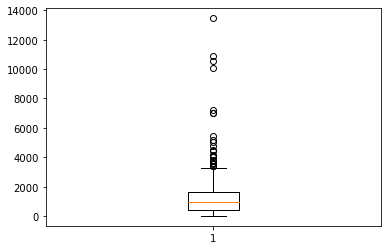

In [15]:
import matplotlib.pyplot as plt
plt.boxplot(x=[df['distance']])
plt.show()

가장 가까운 하천까지의 거리이므로 2.3km 이상인 것들의 거리도 그냥 두었음.
IQR75를 넘어가는 값들도 이상치라고 보기는 어려움

In [16]:
HK = load_data_from_rds('MainData_희경')
HK

,번호,주변 동물종 개수,주변동물 출현빈도,지형기호(5km)
0,1495,2,2,X
1,1277,3,5,X
2,1278,0,0,X
3,1279,0,0,X
4,1090,0,0,X
...,...,...,...,...
492,1089,0,0,X
493,1087,0,0,X
494,1088,0,0,X
495,1091,0,0,X


In [9]:
df = df[['번호', 'distance']]
df.rename(columns={'distance':'하천거리(km)'}, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24076\438115408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'distance':'하천거리(km)'}, inplace=True)


In [10]:
result = HK.merge(df, on='번호')
result

,번호,주변 동물종 개수,주변동물 출현빈도,지형기호(5km),하천거리(km)
0,1495,2,2,X,134.468063
1,1277,3,5,X,434.781679
2,1278,0,0,X,74.780224
3,1279,0,0,X,125.168772
4,1090,0,0,X,2275.200182
...,...,...,...,...,...
492,1089,0,0,X,2274.279975
493,1087,0,0,X,1722.566263
494,1088,0,0,X,2532.215687
495,1091,0,0,X,2096.234333


In [17]:
result.to_sql('MainData_희경', con=db_connection, if_exists='replace', index=False)

497

## Done!